In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

We can see that there are some of the missing values in column of market category and other. We have to deal with the missing values first.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns= {'msrp':'Price' } , inplace = True)


In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
mask = (df['make'].isin(['BMW'])) & (df['engine_cylinders'].isnull())
count_null_engine_cylinders = df[mask]['engine_cylinders'].isnull().sum()

print(count_null_engine_cylinders)

0


In [ ]:
import pandas as pd
missing_engine_cylinders_df = df[df['engine_cylinders'].isnull()]


make_value_counts = missing_engine_cylinders_df['make'].value_counts()

print("Missing engine cylinders count for each make:")
print(make_value_counts)

Missing engine cylinders count for each make:
Mazda         20
Volkswagen     4
Mitsubishi     3
Chevrolet      2
Toyota         1
Name: make, dtype: int64


In [ ]:

chevrolet_df = df[df['make'] == 'Chevrolet']

unique_engine_cylinders_chevrolet = chevrolet_df['engine_cylinders'].value_counts()

print("Unique engine cylinders for Chevrolet:")
print(unique_engine_cylinders_chevrolet)


Unique engine cylinders for Chevrolet:
6.0    438
4.0    349
8.0    321
0.0      6
5.0      5
3.0      2
Name: engine_cylinders, dtype: int64


In [ ]:
df.drop('market_category' , axis = 1 , inplace = True)


we can remove the market category columns as it doesnt give any meaning to our data


In [ ]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
Price                 0
dtype: int64

there are only few missing values

In [ ]:
df['engine_fuel_type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

We can use mode for catagorical value and replace the missing value by regular unleaded

In [ ]:
df['engine_fuel_type'] = df['engine_fuel_type'].fillna('regular unleaded')

In [ ]:
import pandas as pd

missing_engine_hp_df = df[df['engine_hp'].isnull()]


unique_makes_with_missing_engine_hp = missing_engine_hp_df['make'].value_counts()

print("Unique makes with missing engine horsepower:")
print(unique_makes_with_missing_engine_hp)


Unique makes with missing engine horsepower:
Tesla            18
Ford             13
Nissan           10
Lincoln           8
Chevrolet         6
Kia               5
FIAT              3
Honda             2
Toyota            2
Mitsubishi        1
Mercedes-Benz     1
Name: make, dtype: int64


In [ ]:
df['engine_hp'] = df['engine_hp'].fillna(0)

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df.dropna(subset=['engine_cylinders'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11884 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11884 non-null  object 
 1   model              11884 non-null  object 
 2   year               11884 non-null  int64  
 3   engine_fuel_type   11884 non-null  object 
 4   engine_hp          11884 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11884 non-null  object 
 7   driven_wheels      11884 non-null  object 
 8   number_of_doors    11878 non-null  float64
 9   vehicle_size       11884 non-null  object 
 10  vehicle_style      11884 non-null  object 
 11  highway_mpg        11884 non-null  int64  
 12  city_mpg           11884 non-null  int64  
 13  popularity         11884 non-null  int64  
 14  Price              11884 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
Price                0
dtype: int64

In [ ]:
df['number_of_doors'].unique()

array([ 2.,  4.,  3., nan])

In [ ]:
df.dropna(subset=['number_of_doors'] , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11878 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11878 non-null  object 
 1   model              11878 non-null  object 
 2   year               11878 non-null  int64  
 3   engine_fuel_type   11878 non-null  object 
 4   engine_hp          11878 non-null  float64
 5   engine_cylinders   11878 non-null  float64
 6   transmission_type  11878 non-null  object 
 7   driven_wheels      11878 non-null  object 
 8   number_of_doors    11878 non-null  float64
 9   vehicle_size       11878 non-null  object 
 10  vehicle_style      11878 non-null  object 
 11  highway_mpg        11878 non-null  int64  
 12  city_mpg           11878 non-null  int64  
 13  popularity         11878 non-null  int64  
 14  Price              11878 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
Price                0
dtype: int64

we have successfully tackled with all the missing values and there are no any missing value remaining. Now lets check for any duplication in our data

In [ ]:
df.duplicated().sum()

720

we have total of 720 duplicates in our dataframe.

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(11158, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11158 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11158 non-null  object 
 1   model              11158 non-null  object 
 2   year               11158 non-null  int64  
 3   engine_fuel_type   11158 non-null  object 
 4   engine_hp          11158 non-null  float64
 5   engine_cylinders   11158 non-null  float64
 6   transmission_type  11158 non-null  object 
 7   driven_wheels      11158 non-null  object 
 8   number_of_doors    11158 non-null  float64
 9   vehicle_size       11158 non-null  object 
 10  vehicle_style      11158 non-null  object 
 11  highway_mpg        11158 non-null  int64  
 12  city_mpg           11158 non-null  int64  
 13  popularity         11158 non-null  int64  
 14  Price              11158 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


Now Lets split our data into Numeric and Categorical Columns so that we can treat each of them separately for clearning and other purposes.

In [ ]:
numeric_cols = df.select_dtypes(include= ['int64', 'float64'])
categorical_cols = df.select_dtypes(include= 'object')

In [ ]:
numeric_cols.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'Price'],
      dtype='object')

In [ ]:
categorical_cols.columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [ ]:
for col in categorical_cols:
  print(col)
  print(df[col].value_counts())

  print('#'*30)


make
Chevrolet        1081
Ford              824
Toyota            715
Volkswagen        564
Nissan            551
Dodge             528
GMC               482
Honda             433
Cadillac          396
Mazda             392
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        205
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            68
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
Tesla              13
McLaren             5
Alfa Romeo          5
Genes

In [ ]:
df.drop(df[df['transmission_type'] == "UNKNOWN"].index  , axis = 'index' , inplace = True)

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df['transmission_type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE'],
      dtype=object)

In [ ]:
df[['make' , 'model']].value_counts()

make         model         
Chevrolet    Silverado 1500    156
Toyota       Tundra            129
Ford         F-150             126
GMC          Sierra 1500        90
Nissan       Frontier           76
                              ... 
Lamborghini  Reventon            1
McLaren      650S Spider         1
             650S Coupe          1
             570S                1
Ford         Focus RS            1
Length: 923, dtype: int64

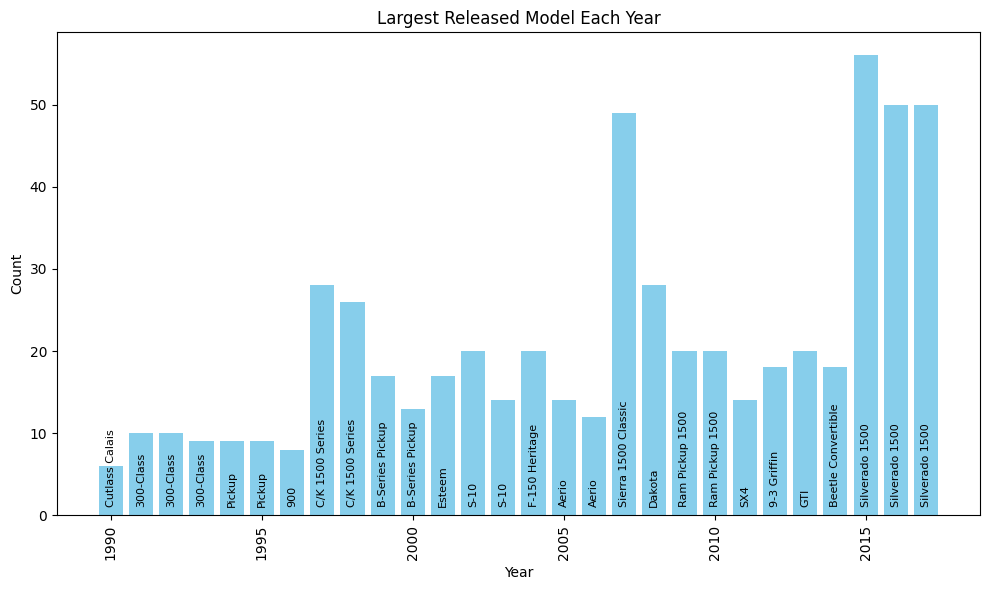

In [ ]:

year_model_counts = df.groupby(['year', 'model']).size().reset_index(name='count')

largest_models = year_model_counts.loc[year_model_counts.groupby('year')['count'].idxmax()]


plt.figure(figsize=(10, 6))
for year, model in zip(largest_models['year'], largest_models['model']):
    plt.text(year, 1, model, rotation=90, ha='center', va='bottom', fontsize=8)

plt.bar(largest_models['year'], largest_models['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Largest Released Model Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df_2012 = df[df['year'] == 2012]

model_counts_2012 = df_2012['model'].value_counts()

largest_model_2012 = model_counts_2012.idxmax()

print("The largest created model in 2012:", largest_model_2012)


The largest created model in 2012: 9-3 Griffin


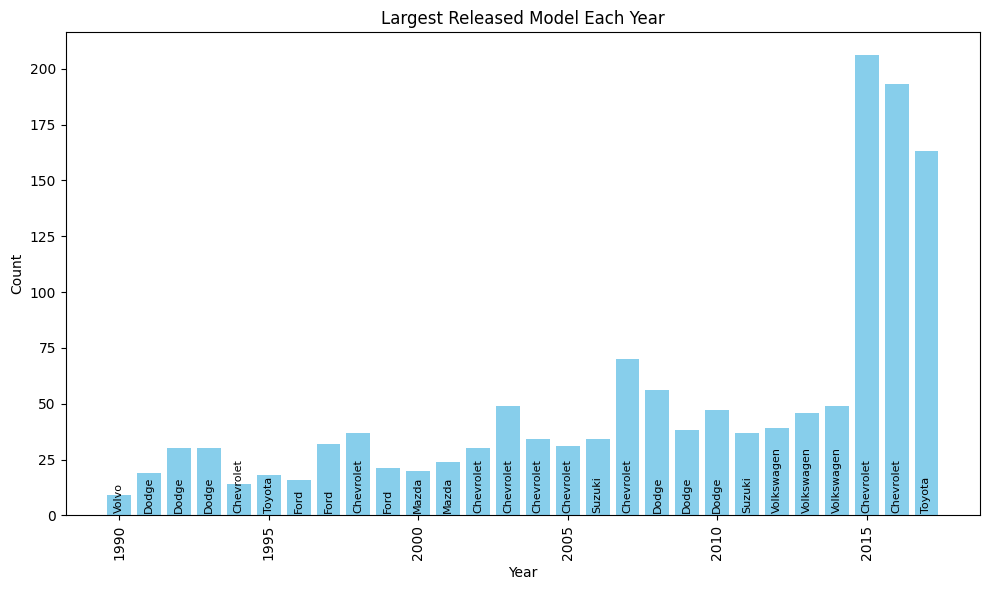

In [ ]:
year_model_counts = df.groupby(['year', 'make']).size().reset_index(name='count')

largest_models = year_model_counts.loc[year_model_counts.groupby('year')['count'].idxmax()]


plt.figure(figsize=(10, 6))
for year, model in zip(largest_models['year'], largest_models['make']):
    plt.text(year, 1, model, rotation=90, ha='center', va='bottom', fontsize=8)

plt.bar(largest_models['year'], largest_models['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Largest Released Model Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that after 2014 Chevrolet has increased their production by a huge huge amount.

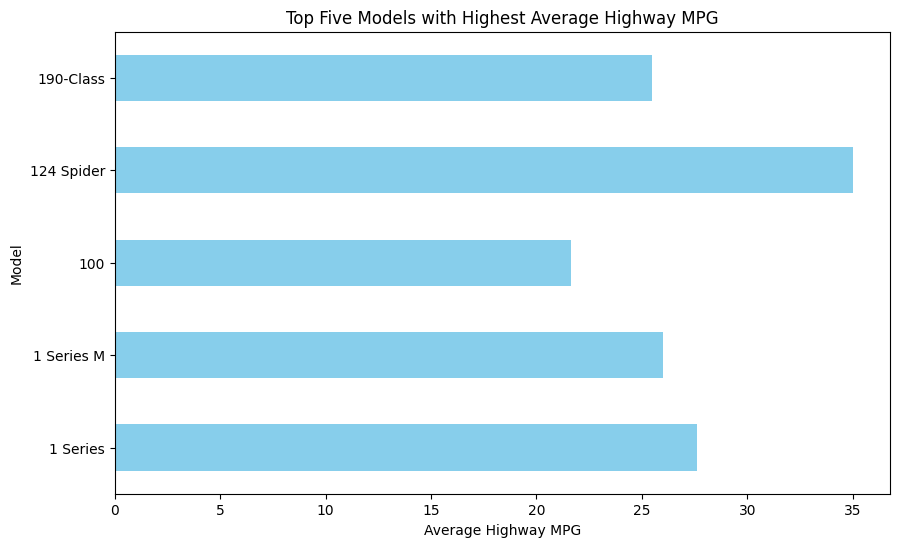

In [ ]:
avg_highway_mpg = df.groupby('model')['highway_mpg'].mean()

top_five_avg_highway_mpg = avg_highway_mpg.head(5)

plt.figure(figsize=(10, 6))
top_five_avg_highway_mpg.plot(kind='barh', color='skyblue')
plt.xlabel('Average Highway MPG')
plt.ylabel('Model')
plt.title('Top Five Models with Highest Average Highway MPG')
plt.show()


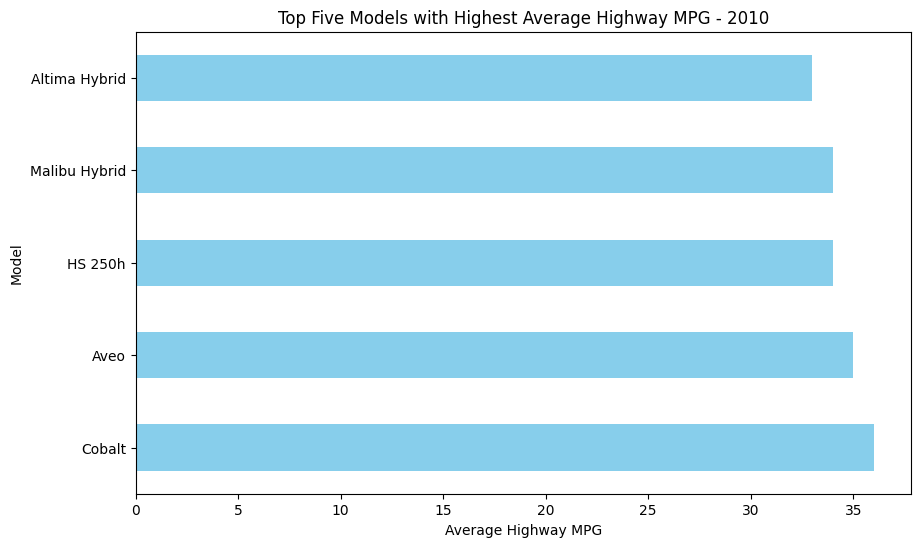

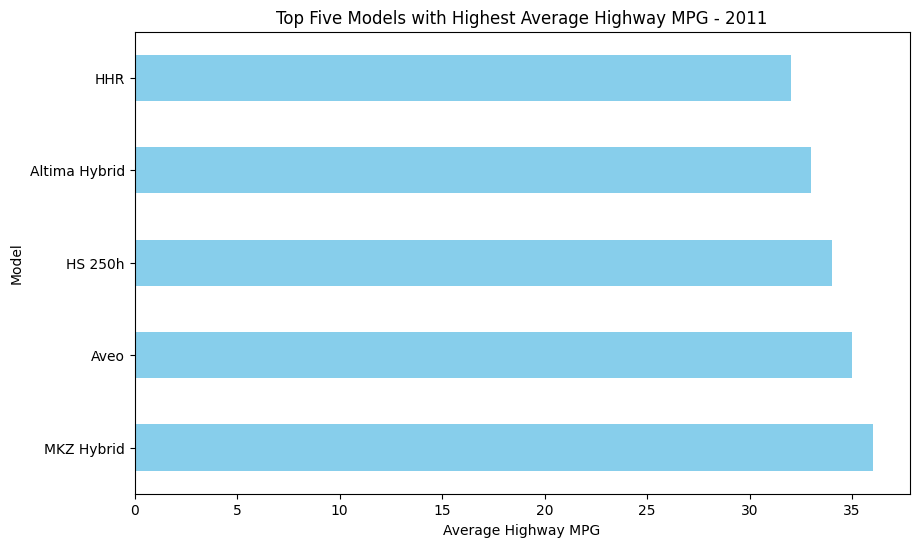

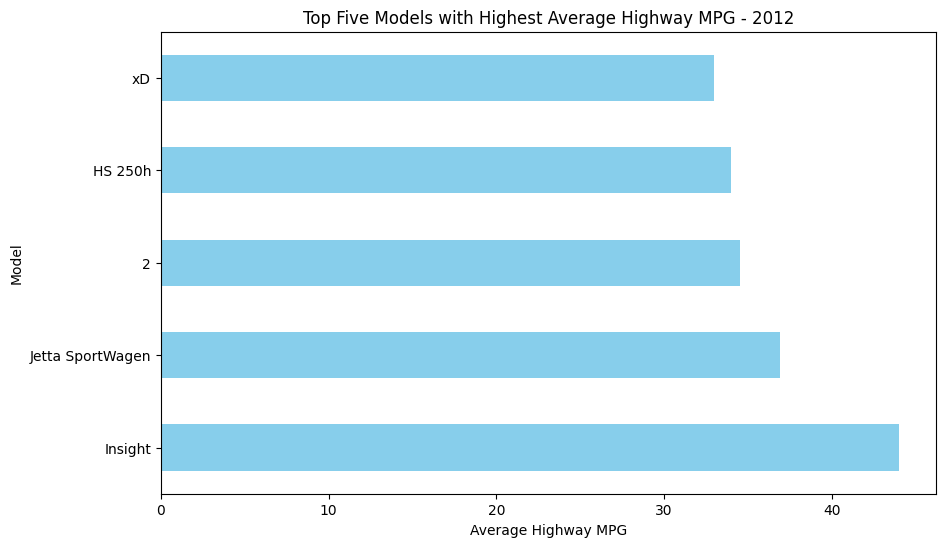

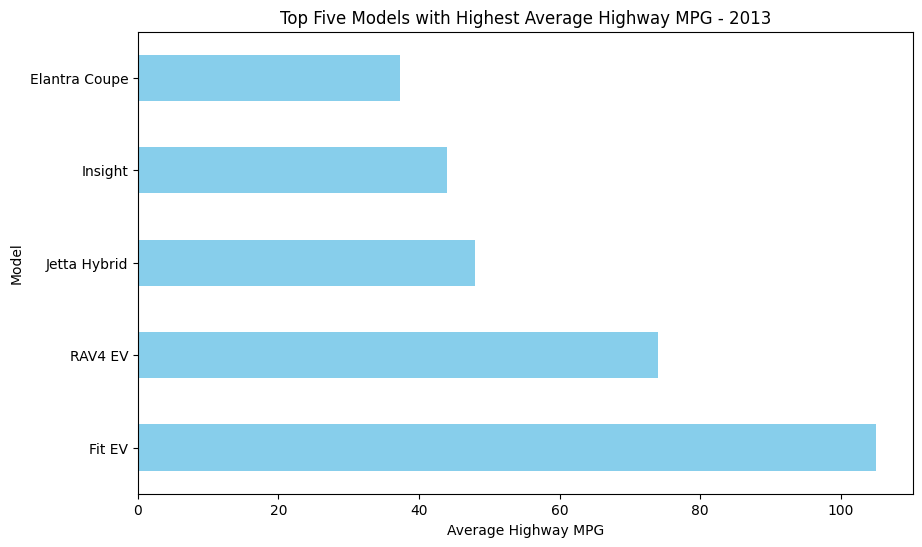

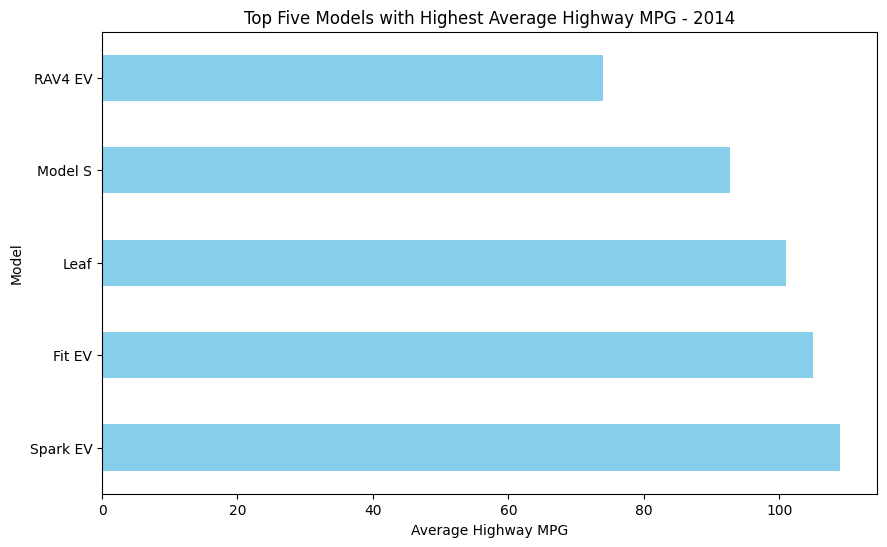

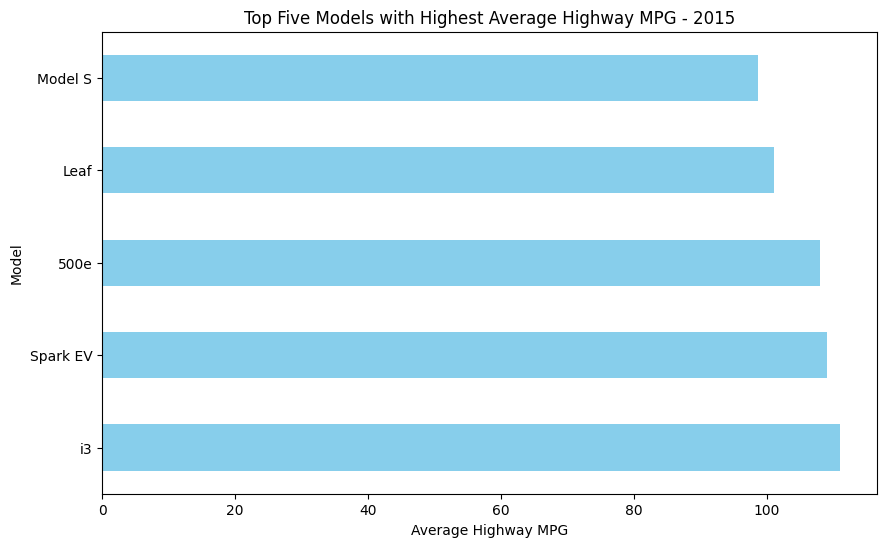

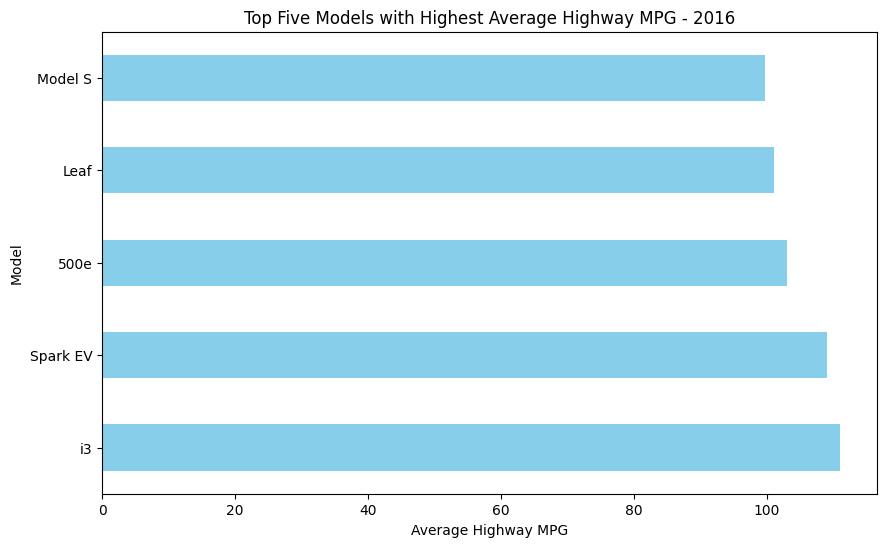

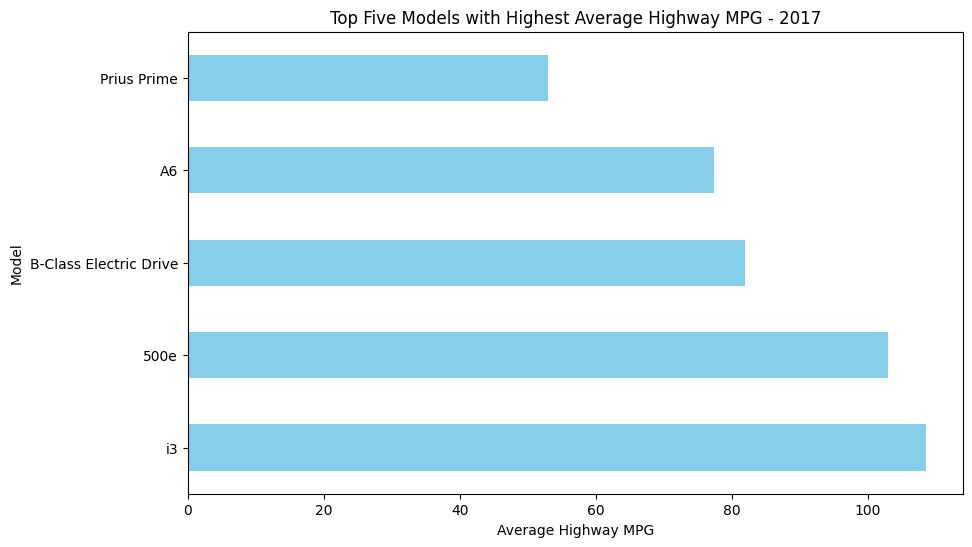

In [ ]:
top_five_models_by_year = {}

for year in range(2010, 2018):

    df_year = df[df['year'] == year]

    avg_highway_mpg = df_year.groupby('model')['highway_mpg'].mean().sort_values(ascending=False)


    top_five_models_by_year[year] = avg_highway_mpg.head(5)

for year, top_five_avg_highway_mpg in top_five_models_by_year.items():
    plt.figure(figsize=(10, 6))
    top_five_avg_highway_mpg.plot(kind='barh', color='skyblue')
    plt.xlabel('Average Highway MPG')
    plt.ylabel('Model')
    plt.title(f'Top Five Models with Highest Average Highway MPG - {year}')
    plt.show()

In [ ]:
df[
    (df['year'] == 2017) & (df['model'] == 'i3')
][['model','highway_mpg']].groupby('model')['highway_mpg'].mean()

model
i3    108.5
Name: highway_mpg, dtype: float64

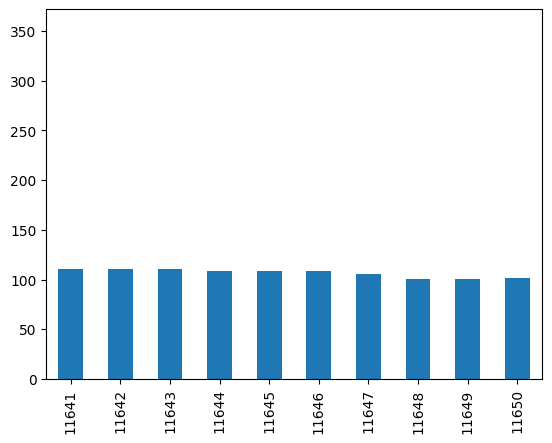

In [ ]:
df['engine_fuel_type'].value_counts()

regular unleaded                                6641
premium unleaded (required)                     1938
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
flex-fuel (premium unleaded required/E85)         53
electric                                          51
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

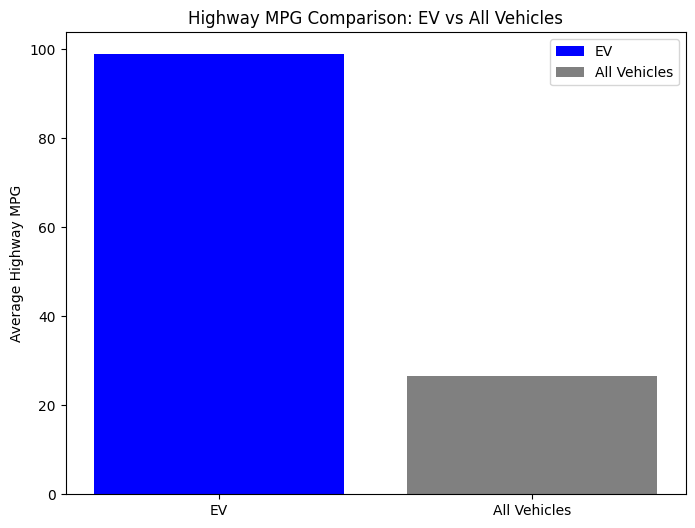

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ev_df = df[df['engine_fuel_type'] == 'electric']
avg_highway_mpg_ev = ev_df['highway_mpg'].mean()
avg_highway_mpg_all = df['highway_mpg'].mean()
plt.figure(figsize=(8, 6))
plt.bar("EV", avg_highway_mpg_ev, color='blue', label='EV')
plt.bar("All Vehicles", avg_highway_mpg_all, color='gray', label='All Vehicles')
plt.ylabel('Average Highway MPG')
plt.title('Highway MPG Comparison: EV vs All Vehicles')
plt.legend()
plt.show()


In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df['vehicle_style'].value_counts()

Sedan                  2834
4dr SUV                2433
Coupe                  1152
Convertible             739
4dr Hatchback           654
Crew Cab Pickup         654
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           409
Passenger Minivan       389
Regular Cab Pickup      344
Passenger Van           121
2dr SUV                  87
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: vehicle_style, dtype: int64

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
